In [1]:
import pandas as pd
import re
import string
import emoji

df = pd.read_csv('C:/Users/Beyza/Desktop/app-project1/reviews.csv')

def temizle(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()  # Küçük harfe çevir
    text = emoji.replace_emoji(text, replace='')  # Emojileri sil
    text = re.sub(r'\d+', '', text)  # Rakamları sil
    text = text.translate(str.maketrans('', '', string.punctuation))  # Noktalama sil
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # ASCII dışı karakter sil 
    text = re.sub(r'\s+', ' ', text).strip()  # Fazla boşlukları sil
    return text

df['cleanedReview'] = df['Review'].apply(temizle)

df.to_csv('C:/Users/Beyza/Desktop/app-project1/reviews_cleaned_ultimate.csv', index=False, encoding='utf-8-sig')

print(" Metin temizleme tamamlandı. Temizlenmiş dosya kaydedildi.")


✅ Metin temizleme tamamlandı. Temizlenmiş dosya kaydedildi.


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# NLTK kaynaklarını indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Veriyi oku
df = pd.read_csv("reviews_cleaned_ultimate.csv")

# 2. Temizlenmiş yorumları al
cleaned_reviews = df['cleanedReview'].dropna().tolist()

# 3. Tokenization
tokenized_sentences = [nltk.word_tokenize(review) for review in cleaned_reviews]

# 4. Stopword temizliği
stop_words = set(stopwords.words('english'))
filtered_sentences = [
    [word for word in sentence if word not in stop_words]
    for sentence in tokenized_sentences
]

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_sentences = [
    [lemmatizer.lemmatize(word) for word in sentence]
    for sentence in filtered_sentences
]
df_lemma = pd.DataFrame({
    'cleanedReview': cleaned_reviews,
    'lemmatized': [' '.join(sent) for sent in lemmatized_sentences]
})
df_lemma.to_csv("reviews_lemmatized.csv", index=False, encoding='utf-8-sig')

# 6. Stemming
stemmer = PorterStemmer()
stemmed_sentences = [
    [stemmer.stem(word) for word in sentence]
    for sentence in filtered_sentences
]
df_stem = pd.DataFrame({
    'cleanedReview': cleaned_reviews,
    'stemmed': [' '.join(sent) for sent in stemmed_sentences]
})
df_stem.to_csv("reviews_stemmed.csv", index=False, encoding='utf-8-sig')

print(" Lemmatized ve stemmed yorumlar CSV dosyalarına kaydedildi.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Beyza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Beyza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Beyza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Lemmatized ve stemmed yorumlar CSV dosyalarına kaydedildi.


In [3]:
from gensim.models import Word2Vec

sentences = [review.split() for review in negative_reviews['cleanedReview'] if isinstance(review, str)]

print(f"{len(sentences)} cümle hazırlandı.")


31657 cümle hazırlandı.


## kod, 16 modelin her biri için 5 kelime üzerinden en yakın 5 kelimeyi sade bir şekilde çıktı olarak gösterir. 

In [5]:
import os
from gensim.models import Word2Vec

# Hedef kelimeler
target_words = ['music', 'spotify', 'play', 'song', 'app']

# Model klasörü
model_dir = 'models'


for model_file in os.listdir(model_dir):
    if model_file.endswith('.model'):
        model_path = os.path.join(model_dir, model_file)
        print(f"\n🔹 MODEL: {model_file}")
        model = Word2Vec.load(model_path)

        for word in target_words:
            print(f"\nKelime: '{word}'")
            if word in model.wv.key_to_index:
                similar = model.wv.most_similar(word, topn=5)
                for i, (sim_word, score) in enumerate(similar, 1):
                    print(f"  {i}. {sim_word} (benzerlik: {score:.4f})")
            else:
                print("   Bu kelime modelde bulunamadı.")



🔹 MODEL: lemma_w2_v100_sg0.model

Kelime: 'music'
  1. song (benzerlik: 0.5429)
  2. tune (benzerlik: 0.4529)
  3. musicpodcasts (benzerlik: 0.4503)
  4. anything (benzerlik: 0.4460)
  5. favorite (benzerlik: 0.4416)

Kelime: 'spotify'
  1. app (benzerlik: 0.4931)
  2. subbed (benzerlik: 0.3968)
  3. fitbit (benzerlik: 0.3924)
  4. sadly (benzerlik: 0.3883)
  5. itunes (benzerlik: 0.3742)

Kelime: 'play'
  1. click (benzerlik: 0.7316)
  2. pick (benzerlik: 0.7040)
  3. loop (benzerlik: 0.6992)
  4. select (benzerlik: 0.6985)
  5. press (benzerlik: 0.6974)

Kelime: 'song'
  1. track (benzerlik: 0.7318)
  2. shuffled (benzerlik: 0.6465)
  3. click (benzerlik: 0.6369)
  4. playlist (benzerlik: 0.6207)
  5. album (benzerlik: 0.6180)

Kelime: 'app'
  1. application (benzerlik: 0.7045)
  2. apps (benzerlik: 0.5892)
  3. spotify (benzerlik: 0.4931)
  4. ap (benzerlik: 0.4503)
  5. fully (benzerlik: 0.4311)

🔹 MODEL: lemma_w2_v100_sg1.model

Kelime: 'music'
  1. musicpodcast (benzerlik: 0.728


Kelime: 'music'
  1. musicpodcast (benzerlik: 0.7742)
  2. musici (benzerlik: 0.7146)
  3. convini (benzerlik: 0.6743)
  4. tune (benzerlik: 0.6694)
  5. musicsong (benzerlik: 0.6694)

Kelime: 'spotify'
  1. grait (benzerlik: 0.9086)
  2. manyyi (benzerlik: 0.9078)
  3. tecnic (benzerlik: 0.9053)
  4. betteri (benzerlik: 0.9052)
  5. atleat (benzerlik: 0.9051)

Kelime: 'play'
  1. pali (benzerlik: 0.7601)
  2. playlistand (benzerlik: 0.7596)
  3. playstop (benzerlik: 0.7398)
  4. halfway (benzerlik: 0.7298)
  5. playi (benzerlik: 0.7252)

Kelime: 'song'
  1. songit (benzerlik: 0.7825)
  2. playlisti (benzerlik: 0.7648)
  3. sond (benzerlik: 0.7596)
  4. songsi (benzerlik: 0.7593)
  5. playlistit (benzerlik: 0.7559)

Kelime: 'app'
  1. applic (benzerlik: 0.8138)
  2. appth (benzerlik: 0.7418)
  3. ap (benzerlik: 0.7266)
  4. appit (benzerlik: 0.7256)
  5. appi (benzerlik: 0.7140)

🔹 MODEL: stem_w2_v300_sg0.model

Kelime: 'music'
  1. musicpodcast (benzerlik: 0.5551)
  2. song (benzerli

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Beyza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Beyza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 En çok şikayet edilen başlıklar (kelimeler):
app: 16223 kez
songs: 8506 kez
song: 8407 kez
music: 7814 kez
spotify: 7594 kez
play: 7230 kez
cant: 6123 kez
even: 4641 kez
premium: 4556 kez
playing: 4327 kez
ads: 4189 kez
listen: 4187 kez
dont: 3784 kez
update: 3776 kez
like: 3684 kez
im: 3660 kez
playlist: 3652 kez
want: 3393 kez
fix: 3173 kez
get: 3050 kez


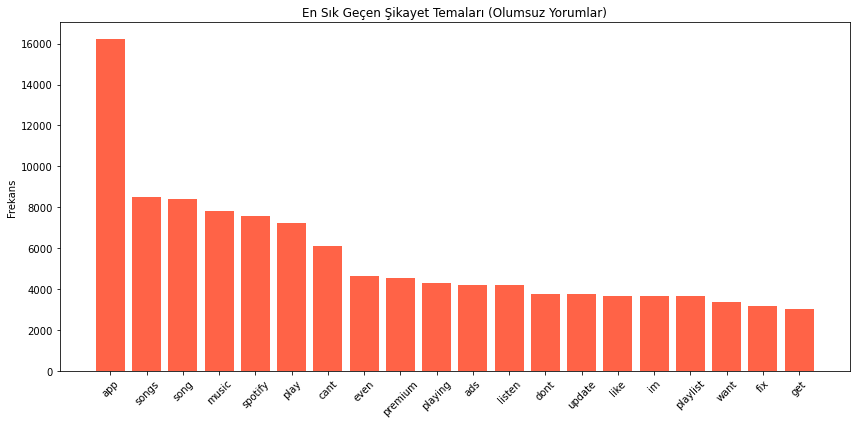

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv("reviews_cleaned_ultimate.csv")

negative_reviews = df[df['Rating'].isin([1, 2])]['cleanedReview'].dropna().tolist()

stop_words = set(stopwords.words('english'))
all_tokens = []
for review in negative_reviews:
    tokens = nltk.word_tokenize(review.lower())
    filtered = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_tokens.extend(filtered)

counter = Counter(all_tokens)
most_common = counter.most_common(20)


print(" En çok şikayet edilen başlıklar (kelimeler):")
for word, count in most_common:
    print(f"{word}: {count} kez")


words, counts = zip(*most_common)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='tomato')
plt.title("En Sık Geçen Şikayet Temaları (Olumsuz Yorumlar)")
plt.xticks(rotation=45)
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()
